### Final Project Milestone 1

#### Team:
Tarush Singh <br>
Hitesh Pant <br>
Shruti Tambe

In [1]:
#### https://raw.githubusercontent.com/TarushS-1996/DataScience_001067923/main/MI-14850-2011Fall-2012Spring.csv
!pip install seaborn
!pip install --upgrade scikit-learn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
import matplotlib.cm as cm
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

## Loading the dataset: Fall 2011 to Spring 2012 data

We will be performing data cleaning and preparation. We will be loading our dataset from a github repository allowing for the code to run regardless.

We will remove the unnecessaary lines and clear our our dataset and make sure they are in right data type.

For this we will be using `pd.to_numeric()` function and set errors to 'coerce' allowing for strting varibles to be returned as NaN values.

In [2]:
import zipfile

In [4]:
# !unzip /Users/shrutitambe/Downloads/FPNN/2006Fall_2017Spring_GOES_meteo_combined.csv.zip

In [2]:
df = pd.read_csv('2006Fall_2017Spring_GOES_meteo_combined.csv')

In [3]:
df.head()

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp (F),RH (%),...,Low Cloud Ht (ft),Med Cloud Ht (ft),High Cloud Ht (ft),Visibility (mi),Atm Press (hPa),Sea Lev Press (hPa),Altimeter (hPa),Precip (in),Wind Chill (F),Heat Index (F)
0,2006-10-01,00:00,2006-09-30,00:00,goes11.2006.10.01.0000.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv,"[0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, nan, ...","[array([ nan, nan, nan, nan, nan...",48,86,...,4100,4800,7000,10,984.0,1007.00,1006.80,0.00,45,NC
1,2006-10-01,01:00,2006-09-30,01:00,goes11.2006.10.01.0100.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0025, nan, 0.0, nan, 0...","[array([ nan, nan, nan, nan, nan...",48,86,...,6000,m,m,10,983.7,1006.50,1006.40,0.00,44,NC
2,2006-10-01,02:00,2006-09-30,02:00,goes11.2006.10.01.0200.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv,"[0.0, nan, 0.0075, nan, nan, 0.0025, nan, nan,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,86,...,5500,11000,m,10,982.7,1005.70,1005.40,0.00,45,NC
3,2006-10-01,03:00,2006-09-30,03:00,goes11.2006.10.01.0300.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0, 0.0075, nan, 0.005,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,86,...,6000,m,m,10,982.0,1005.10,1004.70,0.00,44,NC
4,2006-10-01,04:00,2006-09-30,04:00,goes11.2006.10.01.0400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0, nan, 0.0075, 0.0, nan, nan,...","[array([ nan, nan, nan, nan, nan...",48,89,...,2200,3500,m,8,982.0,1004.90,1004.70,0.02,46,NC


In [4]:
df.shape

(48121, 24)

In [5]:
column_names = df.columns.tolist()
print(column_names)

['Date_UTC', 'Time_UTC', 'Date_CST', 'Time_CST', 'File_name_for_1D_lake', 'File_name_for_2D_lake', 'Lake_data_1D', 'Lake_data_2D', 'Temp (F)', 'RH (%)', 'Dewpt (F)', 'Wind Spd (mph)', 'Wind Direction (deg)', 'Peak Wind Gust(mph)', 'Low Cloud Ht (ft)', 'Med Cloud Ht (ft)', 'High Cloud Ht (ft)', 'Visibility (mi)', 'Atm Press (hPa)', 'Sea Lev Press (hPa)', 'Altimeter (hPa)', 'Precip (in)', 'Wind Chill (F)', 'Heat Index (F)']


In [6]:
# Renaming
df.rename(columns={ "Temp (F)": "Temp_F", "RH (%)": "RH_pct",
                   "Dewpt (F)" : "Dewpt_F", "Wind Spd (mph)" : "Wind_Spd_mph",
                   "Wind Direction (deg)" : "Wind_Direction_deg", "Peak Wind Gust(mph)" : "Peak_Wind_Gust_mph",
                   "Low Cloud Ht (ft)" : "Low_Cloud_Ht_ft", "Med Cloud Ht (ft)" : "Med_Cloud_Ht_ft",
                   "High Cloud Ht (ft)" : "High_Cloud_Ht_ft", "Visibility (mi)" : "Visibility_mi",
                   "Atm Press (hPa)" : "Atm_Press_hPa", "Sea Lev Press (hPa)" : "Sea_Lev_Press_hPa",
                   "Altimeter (hPa)" : "Altimeter_hPa", "Precip (in)" : "Precip_in",
                   "Wind Chill (F)" : "Wind_Chill_F", "Heat Index (F)" : "Heat_Index_F",
                   } , inplace = True)

df.head()

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,...,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,Wind_Chill_F,Heat_Index_F
0,2006-10-01,00:00,2006-09-30,00:00,goes11.2006.10.01.0000.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv,"[0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, nan, ...","[array([ nan, nan, nan, nan, nan...",48,86,...,4100,4800,7000,10,984.0,1007.00,1006.80,0.00,45,NC
1,2006-10-01,01:00,2006-09-30,01:00,goes11.2006.10.01.0100.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0025, nan, 0.0, nan, 0...","[array([ nan, nan, nan, nan, nan...",48,86,...,6000,m,m,10,983.7,1006.50,1006.40,0.00,44,NC
2,2006-10-01,02:00,2006-09-30,02:00,goes11.2006.10.01.0200.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv,"[0.0, nan, 0.0075, nan, nan, 0.0025, nan, nan,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,86,...,5500,11000,m,10,982.7,1005.70,1005.40,0.00,45,NC
3,2006-10-01,03:00,2006-09-30,03:00,goes11.2006.10.01.0300.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0025, 0.0, 0.0075, nan, 0.005,...","[array([nan, nan, nan, nan, nan, nan, nan, nan...",48,86,...,6000,m,m,10,982.0,1005.10,1004.70,0.00,44,NC
4,2006-10-01,04:00,2006-09-30,04:00,goes11.2006.10.01.0400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv,"[0.0025, nan, 0.0, nan, 0.0075, 0.0, nan, nan,...","[array([ nan, nan, nan, nan, nan...",48,89,...,2200,3500,m,8,982.0,1004.90,1004.70,0.02,46,NC


In [7]:
# Replace with 0
les = df.replace(['m', 'M'], '0')

In [8]:
les = les.drop(['Wind_Chill_F', 'Heat_Index_F'], axis=1)
les = les.reset_index(drop=True)

In [9]:
def missing_values(df):
    total_null = df.isna().sum()
    percent_null = total_null / df.count() # Total count of null values / Total count of values
    missing_data = pd.concat([total_null, percent_null], axis = 1, keys = ['Total Null', 'Percentage Null'])
    return missing_data

missing_values(les)

,Total Null,Percentage Null
Date_UTC,0,0.000000
Time_UTC,0,0.000000
Date_CST,0,0.000000
Time_CST,0,0.000000
File_name_for_1D_lake,2941,0.065095
File_name_for_2D_lake,2941,0.065095
Lake_data_1D,0,0.000000
Lake_data_2D,0,0.000000
Temp_F,239,0.004991
RH_pct,239,0.004991


In [10]:
les = les.dropna()
print('Total observation count after missing value treatment: ', len(les))

Total observation count after missing value treatment:  44942


In [11]:
les.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44942 entries, 0 to 48120
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date_UTC               44942 non-null  object
 1   Time_UTC               44942 non-null  object
 2   Date_CST               44942 non-null  object
 3   Time_CST               44942 non-null  object
 4   File_name_for_1D_lake  44942 non-null  object
 5   File_name_for_2D_lake  44942 non-null  object
 6   Lake_data_1D           44942 non-null  object
 7   Lake_data_2D           44942 non-null  object
 8   Temp_F                 44942 non-null  object
 9   RH_pct                 44942 non-null  object
 10  Dewpt_F                44942 non-null  object
 11  Wind_Spd_mph           44942 non-null  object
 12  Wind_Direction_deg     44942 non-null  object
 13  Peak_Wind_Gust_mph     44942 non-null  object
 14  Low_Cloud_Ht_ft        44942 non-null  object
 15  Med_Cloud_Ht_ft        4

In [12]:
# Using apply method
columns = les.columns
les[columns[8:]] = les[columns[8:]].apply(pd.to_numeric, errors='coerce')

In [59]:
les.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44942 entries, 0 to 48120
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date_UTC               44942 non-null  object 
 1   Time_UTC               44942 non-null  object 
 2   Date_CST               44942 non-null  object 
 3   Time_CST               44942 non-null  object 
 4   File_name_for_1D_lake  44942 non-null  object 
 5   File_name_for_2D_lake  44942 non-null  object 
 6   Lake_data_1D           44942 non-null  object 
 7   Lake_data_2D           44942 non-null  object 
 8   Temp_F                 44942 non-null  float64
 9   RH_pct                 44942 non-null  float64
 10  Dewpt_F                44942 non-null  float64
 11  Wind_Spd_mph           44942 non-null  int64  
 12  Wind_Direction_deg     44942 non-null  int64  
 13  Peak_Wind_Gust_mph     44942 non-null  int64  
 14  Low_Cloud_Ht_ft        44942 non-null  int64  
 15  Med_Clo

In [13]:
filtered_les = les.loc[(les['Time_UTC'] >= '14:00')
                     & (les['Time_UTC'] <= '21:00')]
filtered_les

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,...,Wind_Direction_deg,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in
14,2006-10-01,14:00,2006-10-01,14:00,goes11.2006.10.01.1400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...","[array([ nan, nan, nan, ...",60.0,49.0,...,270,0,3600,0,0,10,994.7,1017.8,1017.6,0.0
15,2006-10-01,15:00,2006-10-01,15:00,goes11.2006.10.01.1500.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.06, 0.06, 0.05749...","[array([ nan, nan, nan, ...",60.0,47.0,...,0,0,0,0,0,10,994.7,1017.7,1017.6,0.0
16,2006-10-01,16:00,2006-10-01,16:00,goes11.2006.10.01.1600.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv,"[0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...","[array([ nan, nan, nan, nan, nan...",59.0,55.0,...,40,0,0,0,0,10,994.7,1017.8,1017.6,0.0
17,2006-10-01,17:00,2006-10-01,17:00,goes11.2006.10.01.1700.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.067499995, 0.07, ...","[array([ nan, nan, nan, nan, nan, nan, n...",55.0,71.0,...,0,0,0,0,0,10,994.7,1017.8,1017.6,0.0
18,2006-10-01,18:00,2006-10-01,18:00,goes11.2006.10.01.1800.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv,"[0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...","[array([ nan, nan, nan, nan, nan...",50.0,82.0,...,0,0,8000,0,0,10,994.7,1017.9,1017.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48114,2015-03-31,17:00,2015-03-31,17:00,goes15.2015.03.31.1700.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1700.v01.nc-var1-t0.csv.csv,"[0.225, 0.22749999, 0.48, 0.3075, 0.1925, 0.24...","[array([ nan, nan, nan, nan, nan...",39.0,54.0,...,20,0,7000,10000,0,10,989.0,1012.6,1011.9,0.0
48115,2015-03-31,18:00,2015-03-31,18:00,goes15.2015.03.31.1800.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1800.v01.nc-var1-t0.csv.csv,"[0.2075, 0.1925, 0.18249999, 0.1625, 0.1725, 0...","[array([ nan, nan, nan, nan, nan...",37.0,61.0,...,330,0,5500,7000,0,10,989.3,1012.8,1012.2,0.0
48116,2015-03-31,19:00,2015-03-31,19:00,goes15.2015.03.31.1900.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1900.v01.nc-var1-t0.csv.csv,"[0.22, 0.1925, 0.1775, 0.16749999, 0.16499999,...","[array([ nan, nan, nan, ...",37.0,66.0,...,310,18,3500,5500,0,10,990.7,1014.1,1013.5,0.0
48117,2015-03-31,20:00,2015-03-31,20:00,goes15.2015.03.31.2000.v01.nc-var1-t0.csv,T_goes15.2015.03.31.2000.v01.nc-var1-t0.csv.csv,"[0.2575, 0.22, 0.21249999, 0.17999999, 0.185, ...","[array([ nan, nan, nan, nan, nan...",36.0,85.0,...,0,0,2100,2900,5000,10,991.0,1014.6,1013.9,0.0


In [14]:
filtered_les = filtered_les.reset_index(drop=True)
filtered_les.head()

,Date_UTC,Time_UTC,Date_CST,Time_CST,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,...,Wind_Direction_deg,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in
0,2006-10-01,14:00,2006-10-01,14:00,goes11.2006.10.01.1400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...","[array([ nan, nan, nan, ...",60.0,49.0,...,270,0,3600,0,0,10,994.7,1017.8,1017.6,0.0
1,2006-10-01,15:00,2006-10-01,15:00,goes11.2006.10.01.1500.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.06, 0.06, 0.05749...","[array([ nan, nan, nan, ...",60.0,47.0,...,0,0,0,0,0,10,994.7,1017.7,1017.6,0.0
2,2006-10-01,16:00,2006-10-01,16:00,goes11.2006.10.01.1600.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv,"[0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...","[array([ nan, nan, nan, nan, nan...",59.0,55.0,...,40,0,0,0,0,10,994.7,1017.8,1017.6,0.0
3,2006-10-01,17:00,2006-10-01,17:00,goes11.2006.10.01.1700.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.067499995, 0.07, ...","[array([ nan, nan, nan, nan, nan, nan, n...",55.0,71.0,...,0,0,0,0,0,10,994.7,1017.8,1017.6,0.0
4,2006-10-01,18:00,2006-10-01,18:00,goes11.2006.10.01.1800.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv,"[0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...","[array([ nan, nan, nan, nan, nan...",50.0,82.0,...,0,0,8000,0,0,10,994.7,1017.9,1017.6,0.0


In [15]:
# Summary
filtered_les.describe()

,Temp_F,RH_pct,Dewpt_F,Wind_Spd_mph,Wind_Direction_deg,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in
count,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000
mean,34.777540,68.733329,25.085078,7.167414,159.115778,4.482041,4563.364992,3438.374691,1019.519765,8.158518,990.881814,959.613658,1014.846064,0.002405
std,14.316023,14.901769,13.510689,5.083779,127.925488,9.498400,5745.372636,6299.684479,3960.147230,3.046510,42.279235,233.710831,27.735722,0.016895
min,-15.000000,0.000000,-20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,59.000000,16.000000,3.000000,0.000000,0.000000,1500.000000,0.000000,0.000000,7.000000,987.000000,1009.500000,1009.800000,0.000000
50%,34.000000,70.000000,25.000000,7.000000,190.000000,0.000000,2700.000000,0.000000,0.000000,10.000000,993.000000,1016.400000,1016.300000,0.000000
75%,44.000000,80.000000,34.000000,10.000000,270.000000,0.000000,4500.000000,3900.000000,0.000000,10.000000,999.000000,1022.500000,1022.000000,0.000000
max,88.000000,100.000000,66.000000,34.000000,360.000000,52.000000,28000.000000,25000.000000,26000.000000,10.000000,1018.900000,1043.600000,1042.300000,0.860000


In [16]:
print('Total observations: ', filtered_les.shape[0])
print('Total number of features: ', filtered_les.shape[1])

Total observations:  14951
Total number of features:  22


In [64]:
def arrays_2_png(lat, lon, val, fig_name):
    status_code = -1
    # Here it starts
    if len(lat) == len(lon) == len(val):
        plt.figure(figsize=(10, 10))
        plt.scatter(lon, lat, c=val, cmap=cm.gray, marker='s')
        plt.colorbar(orientation='vertical')
        plt.savefig('/Users/shrutitambe/Downloads/FPNN/michigan/' + fig_name + '.png')
        status_code = 0
    else:
        status_code = 255

    return status_code

In [65]:
df_lat_lon = df_lat_lon = pd.read_csv(
    r'lat_long_1D_labels_for_plotting.csv')
df_lat_lon.head(5)

,latitude,longitude
0,41.78,-87.54
1,41.78,-87.50
2,41.78,-87.46
3,41.78,-87.42
4,41.78,-87.38


In [66]:
df_lat_lon.shape

(3599, 2)

In [67]:
lat_lst = df_lat_lon['latitude'].to_list()
lon_lst = df_lat_lon['longitude'].to_list()

In [68]:
data_sample = filtered_les['Lake_data_1D'][16]
data_sample

'[0.1575, 0.1375, 0.13, 0.1325, 0.1325, 0.1275, 0.13, 0.1275, 0.13499999, 0.1275, 0.1525, 0.22, 0.19749999, 0.155, 0.1375, 0.1525, 0.1425, 0.1475, 0.16, 0.13499999, 0.1325, 0.125, 0.114999995, 0.1275, 0.125, 0.145, 0.1425, 0.1325, 0.16499999, 0.1925, 0.19749999, 0.17, 0.14999999, 0.13499999, 0.16499999, 0.16, 0.16499999, 0.16499999, 0.1725, 0.21, 0.13499999, 0.1375, 0.1325, 0.122499995, 0.1275, 0.114999995, 0.122499995, 0.1275, 0.13499999, 0.1525, 0.16749999, 0.12, 0.14, 0.13, 0.1325, 0.13, 0.16, 0.155, 0.1625, 0.175, 0.16, 0.205, 0.17, 0.1475, 0.16499999, 0.1525, 0.13, 0.12, 0.1375, 0.1325, 0.1475, 0.175, 0.2025, 0.1275, 0.1175, 0.1275, 0.1325, 0.13499999, 0.13, 0.1375, 0.1475, 0.16749999, 0.1725, 0.18249999, 0.195, 0.1475, 0.1325, 0.122499995, 0.175, 0.1525, 0.16499999, 0.1425, 0.13499999, 0.1325, 0.13499999, 0.1475, 0.145, 0.13, 0.1275, 0.1175, 0.114999995, 0.1275, 0.13, 0.1325, 0.1275, 0.1275, 0.1325, 0.1625, 0.19999999, 0.1525, 0.16749999, 0.1375, 0.14, 0.11, 0.14999999, 0.1475, 0

In [70]:
data_sample2 = filtered_les['Lake_data_2D'][16]
data_sample2

'[array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan, 0.37,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan]), array([       nan,        nan,        nan,        nan,        nan,\n              nan,        nan,        nan,        nan,        nan,\n              nan,        nan,        nan,        nan,        nan,\n              nan,        nan,        nan,        nan,        nan,\n              n

1d conversion

In [27]:
import ast

data_sample_lst = ast.literal_eval(data_sample)
data_sample_lst[0:10]

[0.1575,
 0.1375,
 0.13,
 0.1325,
 0.1325,
 0.1275,
 0.13,
 0.1275,
 0.13499999,
 0.1275]

In [28]:
ldata_sample = data_sample.strip('][').split(', ')
ldata_sample[0:10]

['0.1575',
 '0.1375',
 '0.13',
 '0.1325',
 '0.1325',
 '0.1275',
 '0.13',
 '0.1275',
 '0.13499999',
 '0.1275']

In [29]:
data_sample_lst2 = [float(el) for el in ldata_sample]
data_sample_lst2[0:10]

[0.1575,
 0.1375,
 0.13,
 0.1325,
 0.1325,
 0.1275,
 0.13,
 0.1275,
 0.13499999,
 0.1275]

In [30]:
data_sample_lst2 = [float(el) for el in filtered_les['Lake_data_1D'][16].strip('][').split(', ')]
data_sample_lst2[0:10]

[0.1575,
 0.1375,
 0.13,
 0.1325,
 0.1325,
 0.1275,
 0.13,
 0.1275,
 0.13499999,
 0.1275]

In [31]:
data_sample_lst == data_sample_lst2

True

## Plotting 1d

FileNotFoundError: [Errno 2] No such file or directory: '/Users/shrutitambe/Downloads/FPNN/michigan/sample.png'

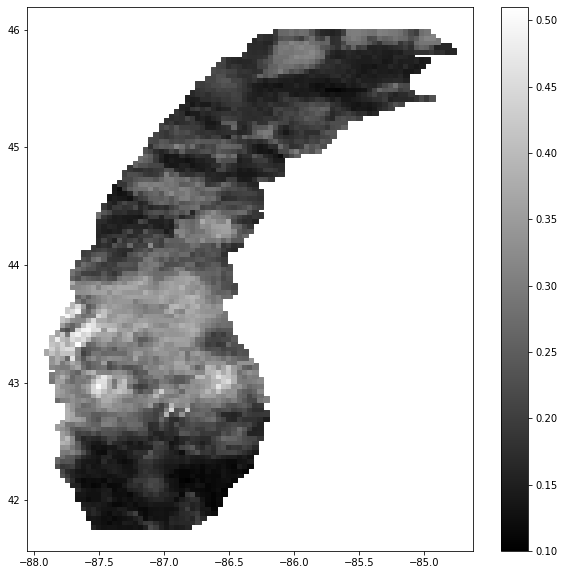

In [34]:
arrays_2_png(lat_lst, lon_lst, data_sample_lst, 'sample')

In [71]:
filtered_les.loc[5177]

Date_UTC                                                        2008-01-18
Time_UTC                                                             15:00
Date_CST                                                        2008-01-18
Time_CST                                                             15:00
File_name_for_1D_lake            goes11.2008.01.18.1500.v01.nc-var1-t0.csv
File_name_for_2D_lake      T_goes11.2008.01.18.1500.v01.nc-var1-t0.csv.csv
Lake_data_1D             [0.0525, 0.055, 0.06, 0.0425, 0.06, 0.055, 0.0...
Lake_data_2D             [array([ nan,  nan,  nan,  nan,  nan,  nan,  n...
Temp_F                                                                20.0
RH_pct                                                                77.0
Dewpt_F                                                               14.0
Wind_Spd_mph                                                            11
Wind_Direction_deg                                                     250
Peak_Wind_Gust_mph       

0

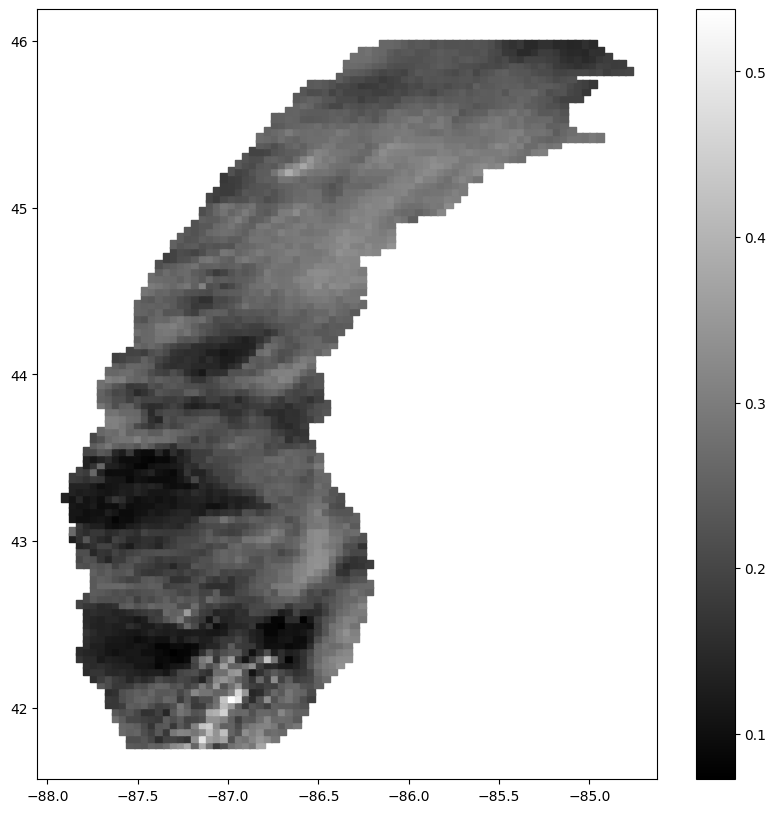

In [32]:
arrays_2_png(lat_lst, lon_lst, ast.literal_eval(filtered_les['Lake_data_1D'][5177]), 'sample')

In [72]:
les['Lake_data_1D'][5177].strip('][').split(', ')

['0.1025',
 '0.095',
 '0.095',
 '0.089999996',
 '0.082499996',
 '0.095',
 '0.0875',
 '0.082499996',
 '0.082499996',
 '0.095',
 '0.082499996',
 '0.085',
 '0.082499996',
 '0.089999996',
 '0.082499996',
 '0.089999996',
 '0.095',
 '0.095',
 '0.1025',
 '0.1025',
 '0.085',
 '0.0875',
 '0.089999996',
 '0.0775',
 '0.0925',
 '0.085',
 '0.082499996',
 '0.089999996',
 '0.082499996',
 '0.0775',
 '0.0875',
 '0.089999996',
 '0.0775',
 '0.0775',
 '0.085',
 '0.0725',
 '0.089999996',
 '0.0875',
 '0.1025',
 '0.0875',
 '0.0975',
 '0.0925',
 '0.0875',
 '0.089999996',
 '0.089999996',
 '0.089999996',
 '0.082499996',
 '0.082499996',
 '0.0925',
 '0.0875',
 '0.085',
 '0.0925',
 '0.082499996',
 '0.0875',
 '0.085',
 '0.0875',
 '0.0875',
 '0.082499996',
 '0.089999996',
 '0.089999996',
 '0.085',
 '0.089999996',
 '0.095',
 '0.105',
 '0.0925',
 '0.082499996',
 '0.089999996',
 '0.089999996',
 '0.089999996',
 '0.08',
 '0.085',
 '0.0775',
 '0.08',
 '0.0875',
 '0.08',
 '0.082499996',
 '0.074999996',
 '0.067499995',
 '0.

In [73]:
def rectify(crap_string):
    return [0.0 if el == 'nan' else float(el) for el in crap_string.strip('][').split(', ')]

0

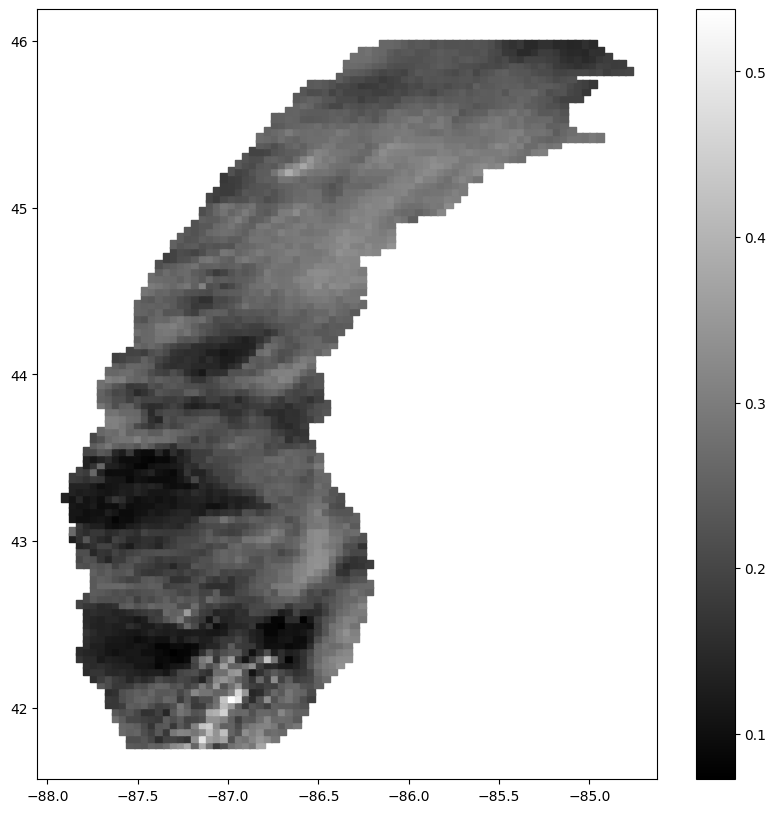

In [35]:
arrays_2_png(lat_lst, lon_lst,
             [0.0 if el == 'nan' else float(el) for el in filtered_les['Lake_data_1D'][5177].strip('][').split(', ')],
             'sample')

0

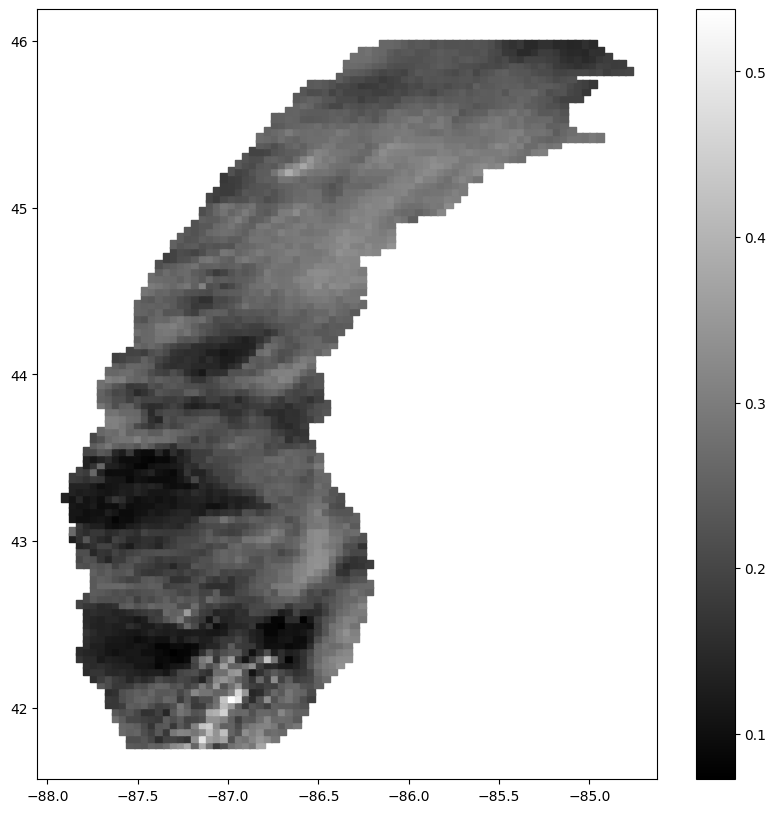

In [36]:
arrays_2_png(lat_lst, lon_lst,
             rectify(filtered_les['Lake_data_1D'][5177]),
             'sample')

In [74]:
filtered_les.loc[10457]

Date_UTC                                                        2011-01-05
Time_UTC                                                             14:00
Date_CST                                                        2011-01-05
Time_CST                                                             14:00
File_name_for_1D_lake               goes13.2011.01.05.1400.v01.nc-var0.csv
File_name_for_2D_lake         T_goes13.2011.01.05.1400.v01.nc-var0.csv.csv
Lake_data_1D             [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ...
Lake_data_2D             [array([nan, nan, nan, nan, nan, nan, nan, nan...
Temp_F                                                                22.0
RH_pct                                                                71.0
Dewpt_F                                                               14.0
Wind_Spd_mph                                                             5
Wind_Direction_deg                                                     180
Peak_Wind_Gust_mph       

0

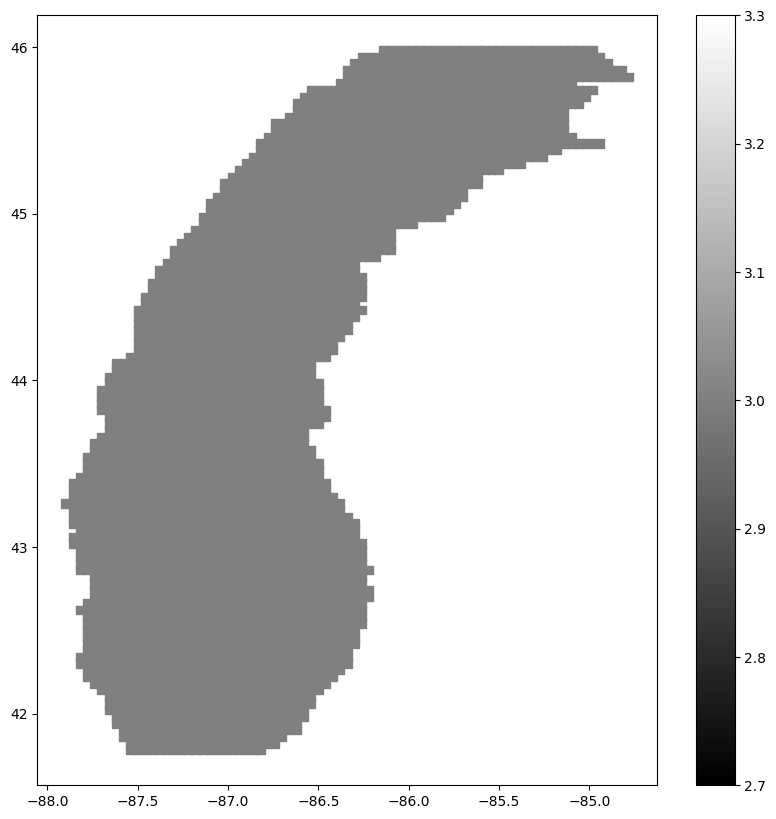

In [38]:
arrays_2_png(lat_lst, lon_lst,
             rectify(filtered_les['Lake_data_1D'][10457]),
             'sample')

In [75]:
filtered_les.loc[10649]

Date_UTC                                                        2011-02-13
Time_UTC                                                             17:00
Date_CST                                                        2011-02-13
Time_CST                                                             17:00
File_name_for_1D_lake               goes13.2011.02.13.1700.v01.nc-var0.csv
File_name_for_2D_lake         T_goes13.2011.02.13.1700.v01.nc-var0.csv.csv
Lake_data_1D             [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, ...
Lake_data_2D             [array([nan, nan, nan, nan, nan, nan, nan, nan...
Temp_F                                                                42.0
RH_pct                                                                57.0
Dewpt_F                                                               28.0
Wind_Spd_mph                                                             9
Wind_Direction_deg                                                     200
Peak_Wind_Gust_mph       

0

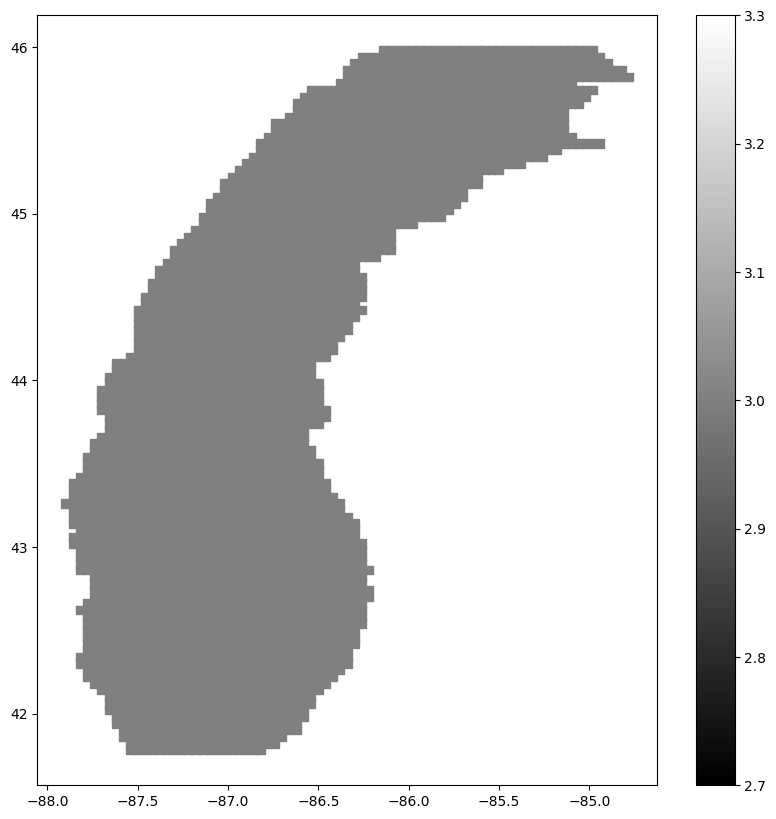

In [40]:
arrays_2_png(lat_lst, lon_lst,
             rectify(filtered_les['Lake_data_1D'][10649]),
             'sample')

Image generation

In [39]:
# Remove the colormap and axis to clean images
def arrays_2_png_data(lat, lon, val, fig_name):
    status_code = -1

    if len(lat) == len(lon) == len(val):
        plt.figure(figsize=(10, 10))
        plt.scatter(lon, lat, c=val, cmap=cm.gray, marker='s')
        plt.axis('off')
        plt.savefig(f'/content/Michigan/' + fig_name +'.png')
        plt.close()
        status_code = 0
    else:
        status_code = 255

    return status_code

[0.012499999, 0.0075, 0.0175, 0.0175, 0.012499999, 0.012499999, 0.012499999, 0.012499999, 0.01, 0.01, 0.005, 0.01, 0.0075, 0.0075, 0.0175, 0.012499999, 0.012499999, 0.01, 0.012499999, 0.012499999, 0.0175, 0.012499999, 0.0175, 0.012499999, 0.015, 0.0025, 0.01, 0.015, 0.0025, 0.012499999, 0.01, 0.015, 0.022499999, 0.012499999, 0.015, 0.0075, 0.0025, 0.02, 0.015, 0.0075, 0.015, 0.012499999, 0.01, 0.012499999, 0.0075, 0.01, 0.0025, 0.0175, 0.0175, 0.012499999, 0.012499999, 0.01, 0.0025, 0.005, 0.015, 0.012499999, 0.01, 0.012499999, 0.0075, 0.02, 0.01, 0.01, 0.01, 0.01, 0.0175, 0.005, 0.012499999, 0.0075, 0.015, 0.012499999, 0.0075, 0.012499999, 0.012499999, 0.0075, 0.02, 0.0075, 0.01, 0.015, 0.0175, 0.012499999, 0.012499999, 0.0025, 0.0075, 0.012499999, 0.0175, 0.012499999, 0.0175, 0.0075, 0.012499999, 0.005, 0.015, 0.012499999, 0.012499999, 0.022499999, 0.012499999, 0.0175, 0.0075, 0.012499999, 0.012499999, 0.012499999, 0.012499999, 0.012499999, 0.01, 0.015, 0.012499999, 0.015, 0.015, 0.0

FileNotFoundError: [Errno 2] No such file or directory: '/content/Michigan/10.png'

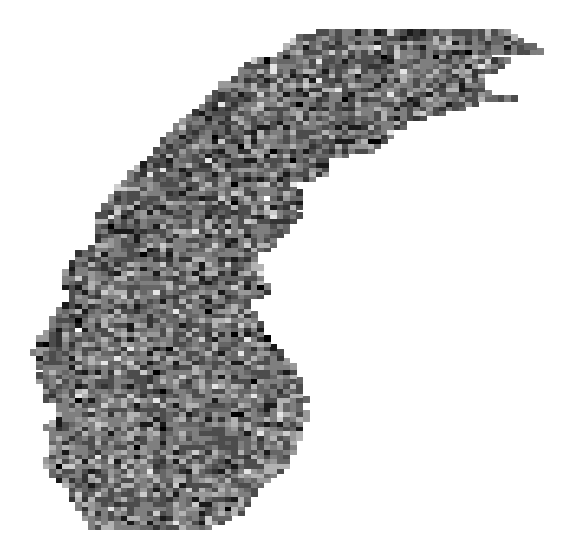

In [76]:
for i, row in les.iterrows():
    if i == 10:
        arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
        print(arr)
        arrays_2_png_data(lat_lst, lon_lst, arr, str(i))
        break

In [42]:
from tqdm import tqdm
for i, row in tqdm(les.iterrows()):
    if i == 100:
        break

92it [00:00, 133.33it/s]


In [77]:
filtered_les = filtered_les.drop(['Date_UTC', 'Time_UTC', 'Date_CST', 'Time_CST'], axis=1)
filtered_les = filtered_les.reset_index(drop=True)
filtered_les.head()

,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,Dewpt_F,Wind_Spd_mph,Wind_Direction_deg,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in
0,goes11.2006.10.01.1400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...","[array([ nan, nan, nan, ...",60.0,49.0,41.0,10,270,0,3600,0,0,10,994.7,1017.8,1017.6,0.0
1,goes11.2006.10.01.1500.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.06, 0.06, 0.05749...","[array([ nan, nan, nan, ...",60.0,47.0,40.0,3,0,0,0,0,0,10,994.7,1017.7,1017.6,0.0
2,goes11.2006.10.01.1600.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv,"[0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...","[array([ nan, nan, nan, nan, nan...",59.0,55.0,43.0,6,40,0,0,0,0,10,994.7,1017.8,1017.6,0.0
3,goes11.2006.10.01.1700.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.067499995, 0.07, ...","[array([ nan, nan, nan, nan, nan, nan, n...",55.0,71.0,46.0,0,0,0,0,0,0,10,994.7,1017.8,1017.6,0.0
4,goes11.2006.10.01.1800.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv,"[0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...","[array([ nan, nan, nan, nan, nan...",50.0,82.0,45.0,0,0,0,8000,0,0,10,994.7,1017.9,1017.6,0.0


In [78]:
# Summary
filtered_les.describe()

,Temp_F,RH_pct,Dewpt_F,Wind_Spd_mph,Wind_Direction_deg,Peak_Wind_Gust_mph,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in
count,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000,14951.000000
mean,34.777540,68.733329,25.085078,7.167414,159.115778,4.482041,4563.364992,3438.374691,1019.519765,8.158518,990.881814,959.613658,1014.846064,0.002405
std,14.316023,14.901769,13.510689,5.083779,127.925488,9.498400,5745.372636,6299.684479,3960.147230,3.046510,42.279235,233.710831,27.735722,0.016895
min,-15.000000,0.000000,-20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,59.000000,16.000000,3.000000,0.000000,0.000000,1500.000000,0.000000,0.000000,7.000000,987.000000,1009.500000,1009.800000,0.000000
50%,34.000000,70.000000,25.000000,7.000000,190.000000,0.000000,2700.000000,0.000000,0.000000,10.000000,993.000000,1016.400000,1016.300000,0.000000
75%,44.000000,80.000000,34.000000,10.000000,270.000000,0.000000,4500.000000,3900.000000,0.000000,10.000000,999.000000,1022.500000,1022.000000,0.000000
max,88.000000,100.000000,66.000000,34.000000,360.000000,52.000000,28000.000000,25000.000000,26000.000000,10.000000,1018.900000,1043.600000,1042.300000,0.860000


In [79]:
print('Total observations: ', filtered_les.shape[0])
print('Total number of features: ', filtered_les.shape[1])

Total observations:  14951
Total number of features:  18


In [81]:
filtered_les = filtered_les.drop(['Dewpt_F', 'Peak_Wind_Gust_mph'], axis=1)
filtered_les = filtered_les.reset_index(drop=True)

# Information about dataset shape
print('Total observations: ', filtered_les.shape[0])
print('Total number of features: ', filtered_les.shape[1])
filtered_les.head()

Total observations:  14951
Total number of features:  16


,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in
0,goes11.2006.10.01.1400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...","[array([ nan, nan, nan, ...",60.0,49.0,10,270,3600,0,0,10,994.7,1017.8,1017.6,0.0
1,goes11.2006.10.01.1500.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.06, 0.06, 0.05749...","[array([ nan, nan, nan, ...",60.0,47.0,3,0,0,0,0,10,994.7,1017.7,1017.6,0.0
2,goes11.2006.10.01.1600.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv,"[0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...","[array([ nan, nan, nan, nan, nan...",59.0,55.0,6,40,0,0,0,10,994.7,1017.8,1017.6,0.0
3,goes11.2006.10.01.1700.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.067499995, 0.07, ...","[array([ nan, nan, nan, nan, nan, nan, n...",55.0,71.0,0,0,0,0,0,10,994.7,1017.8,1017.6,0.0
4,goes11.2006.10.01.1800.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv,"[0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...","[array([ nan, nan, nan, nan, nan...",50.0,82.0,0,0,8000,0,0,10,994.7,1017.9,1017.6,0.0


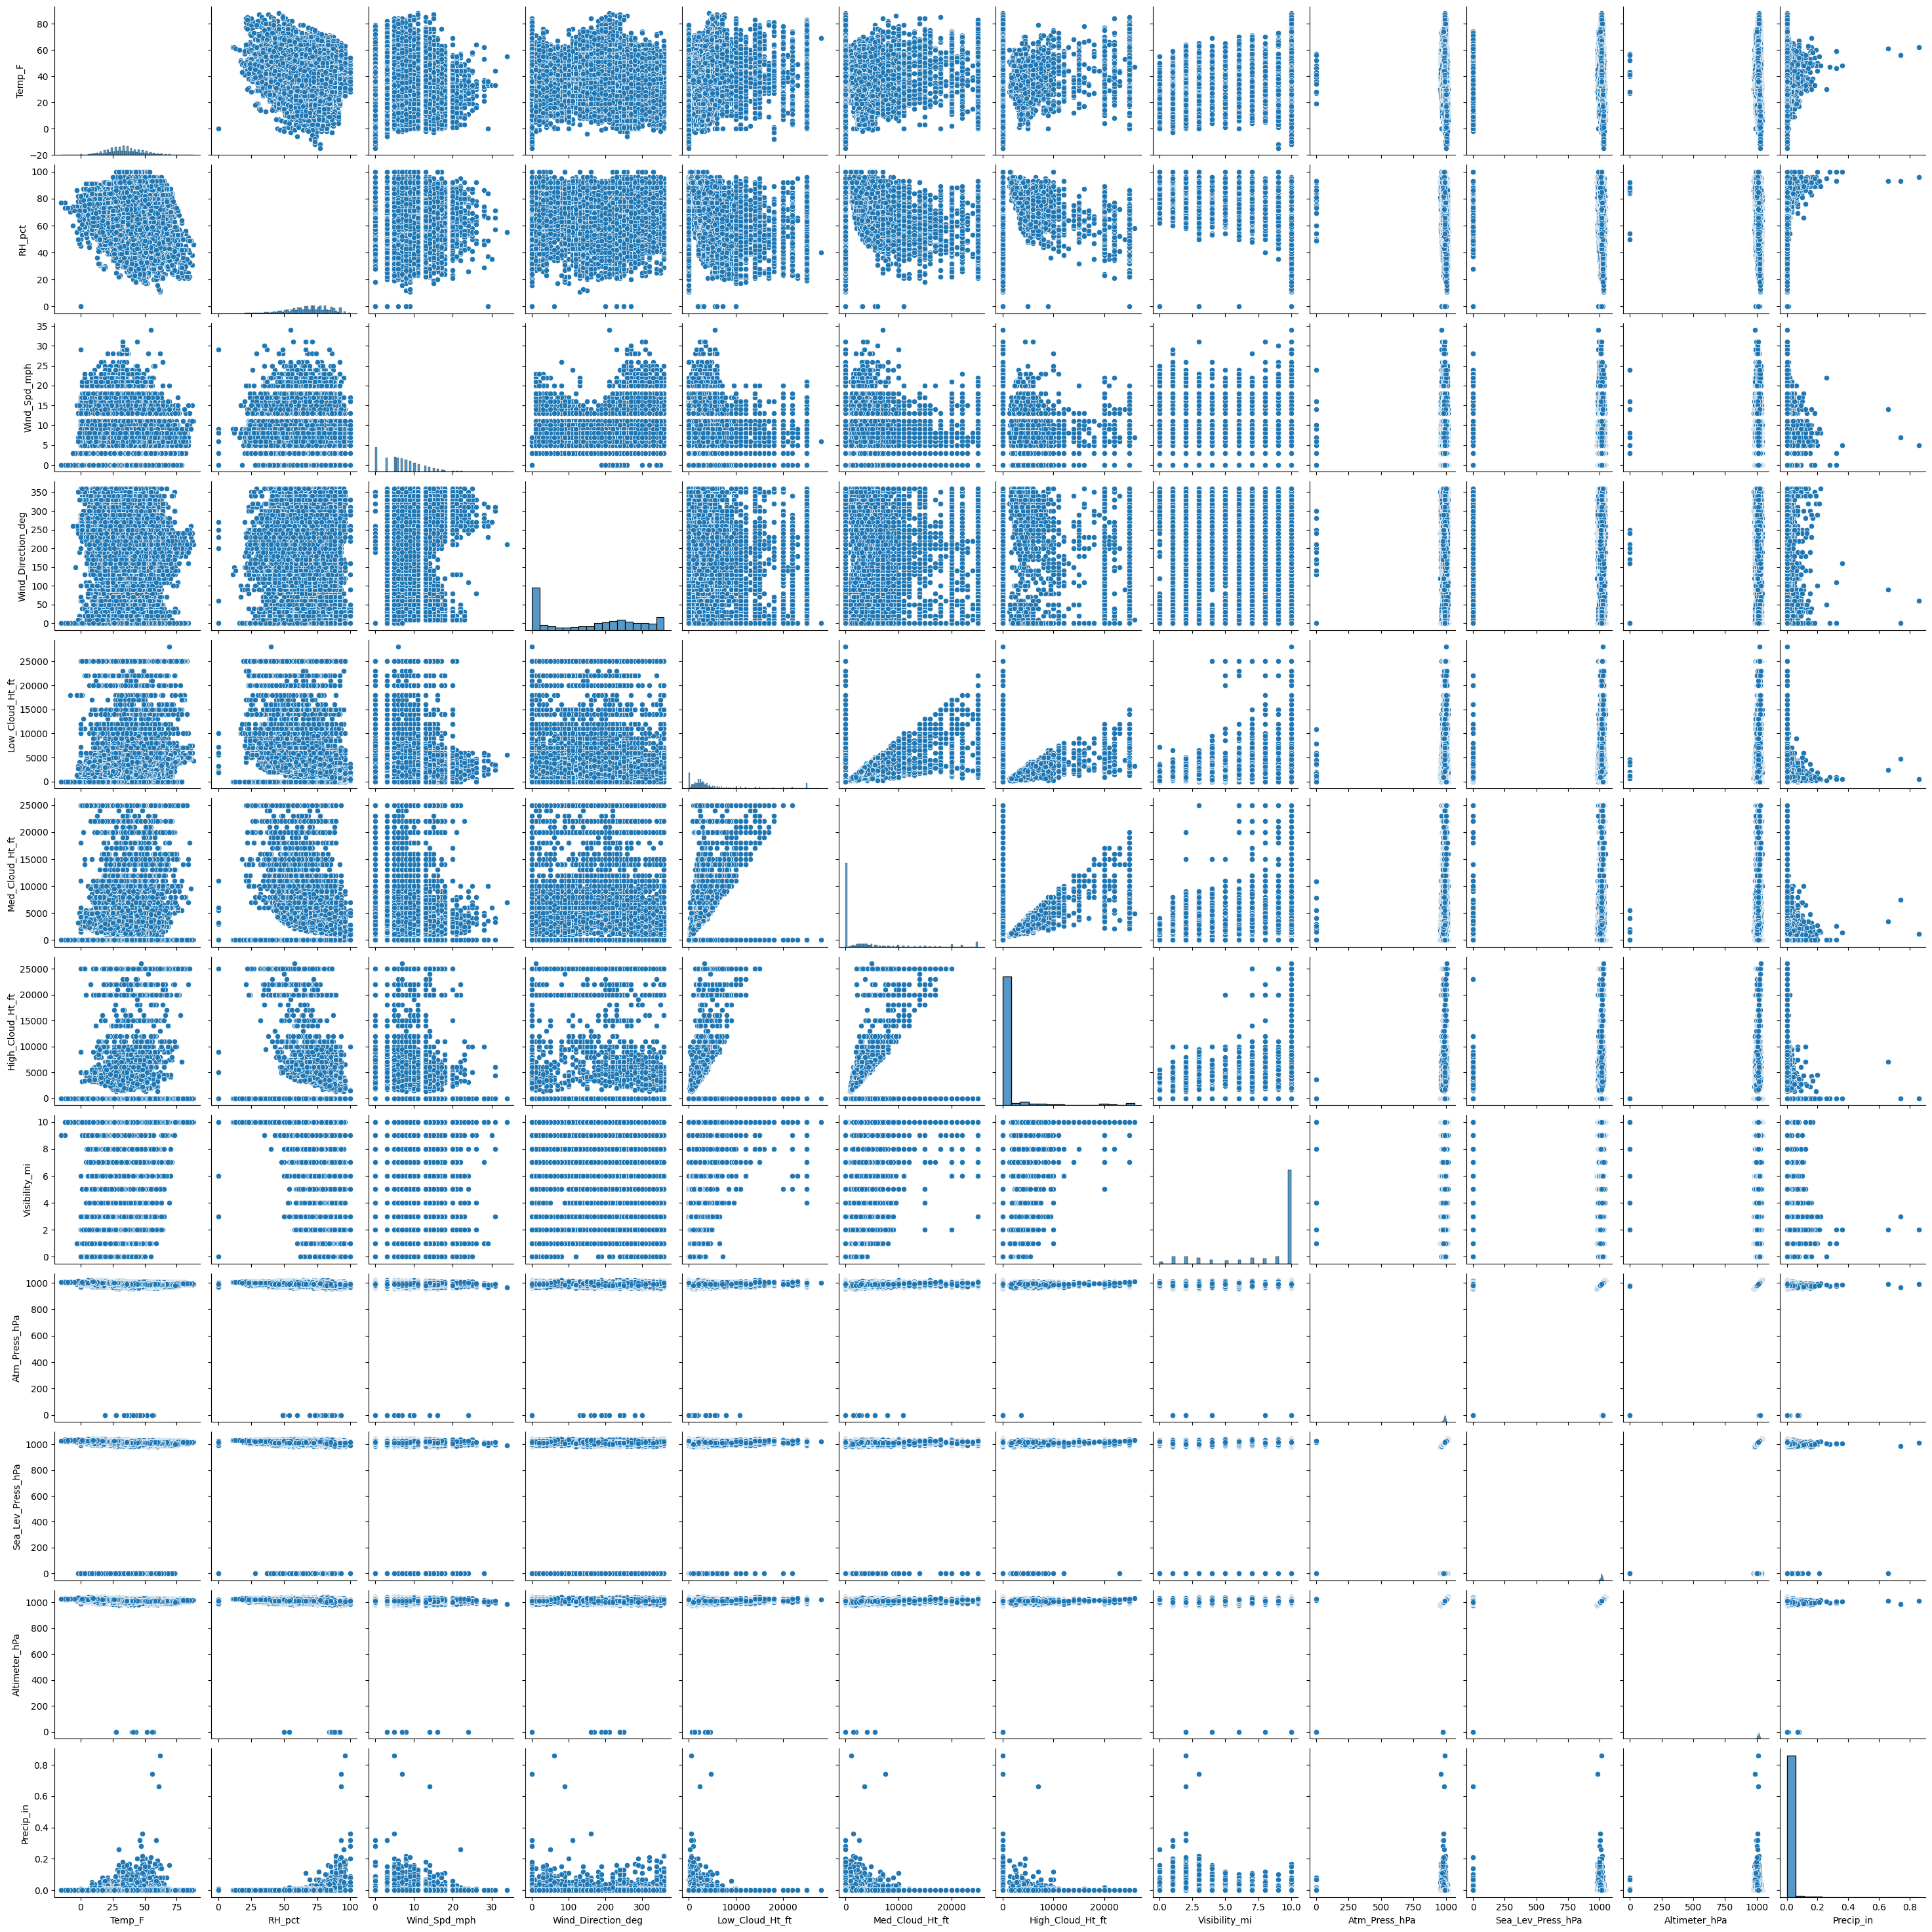

In [49]:
# sns.pairplot(filtered_les)

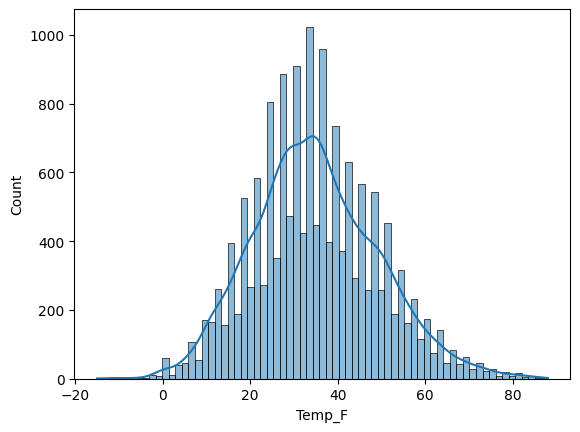

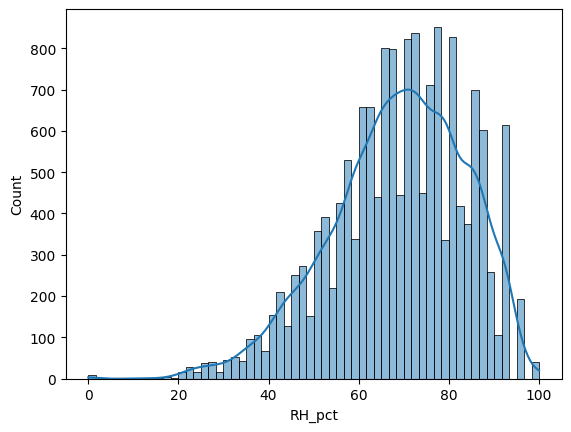

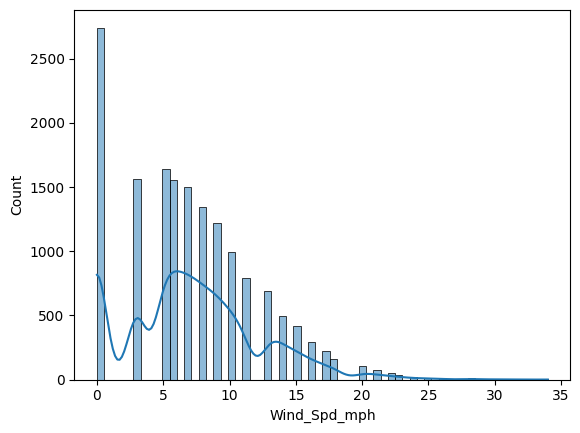

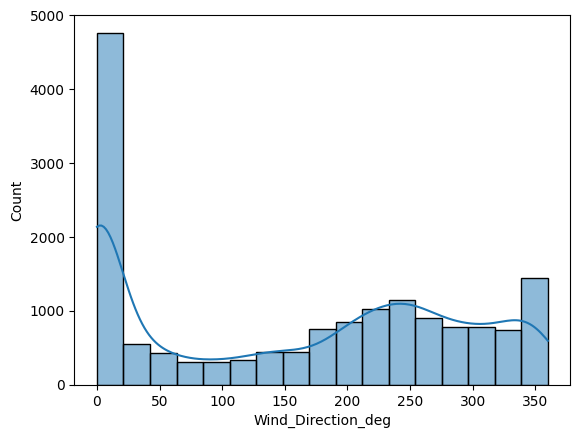

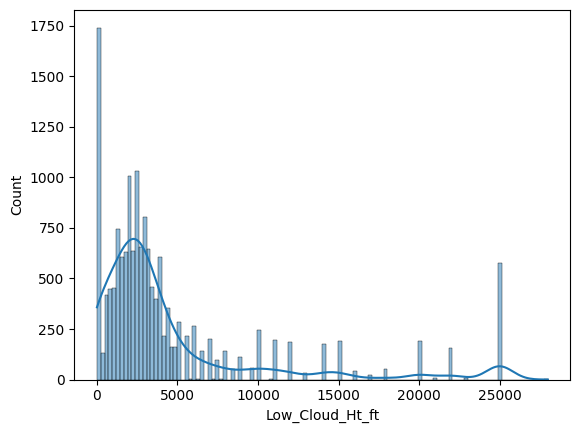

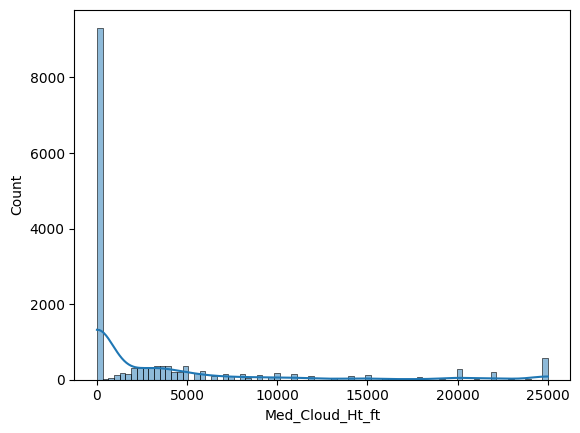

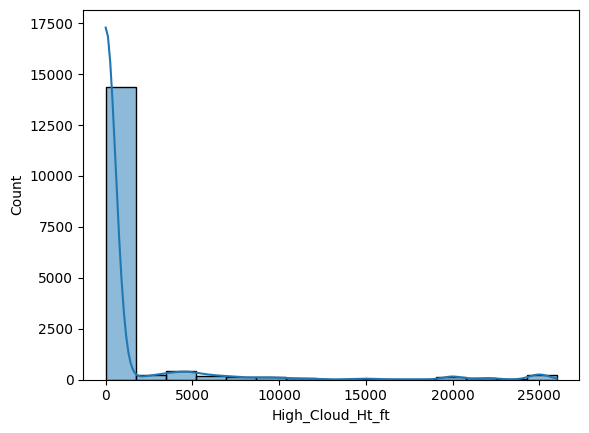

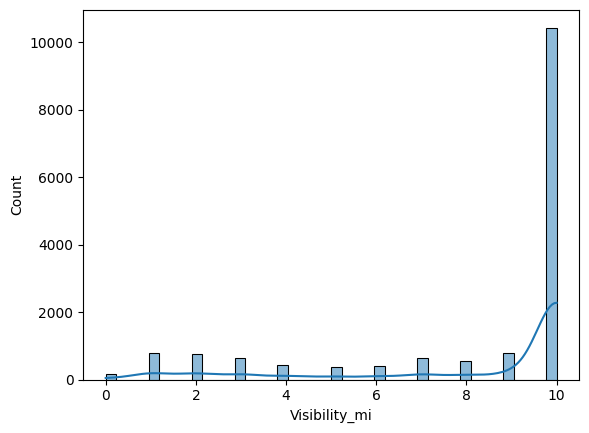

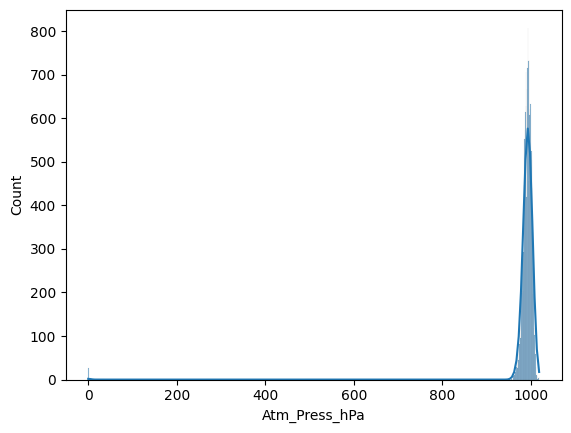

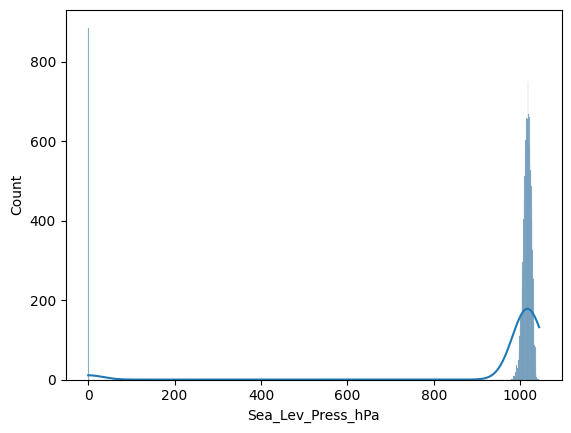

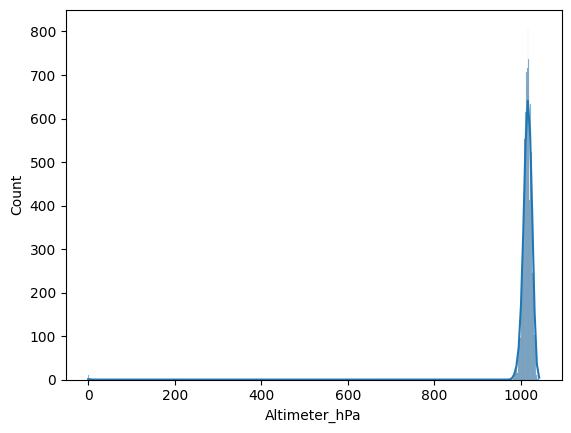

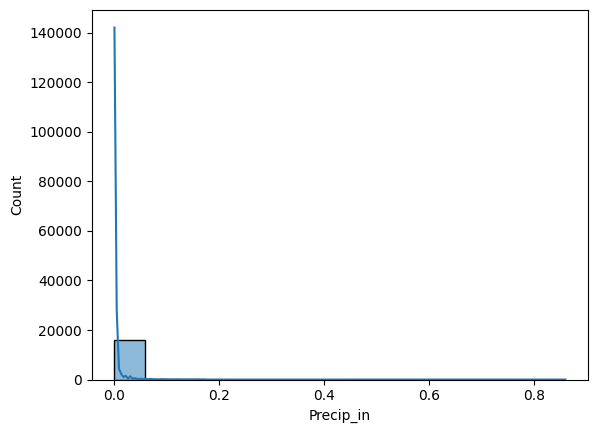

In [50]:
# def distPlot(data):
#     cols = data.columns[4:]
#     for col in cols:
#         sns.histplot(data[col], kde=True)
#         plt.show()

# distPlot(filtered_les)

## Feature engineering: Precipitation

In [82]:
filtered_les["Precip_in"].value_counts()

Precip_in
0.00    13890
0.01      480
0.02      178
0.03      132
0.04       64
0.05       47
0.07       30
0.06       29
0.09       16
0.08       16
0.10       13
0.12        8
0.15        6
0.16        6
0.13        6
0.14        6
0.11        5
0.17        3
0.32        2
0.19        2
0.18        2
0.20        2
0.26        1
0.28        1
0.36        1
0.86        1
0.66        1
0.74        1
0.22        1
0.21        1
Name: count, dtype: int64

<Axes: xlabel='Precip_in', ylabel='Count'>

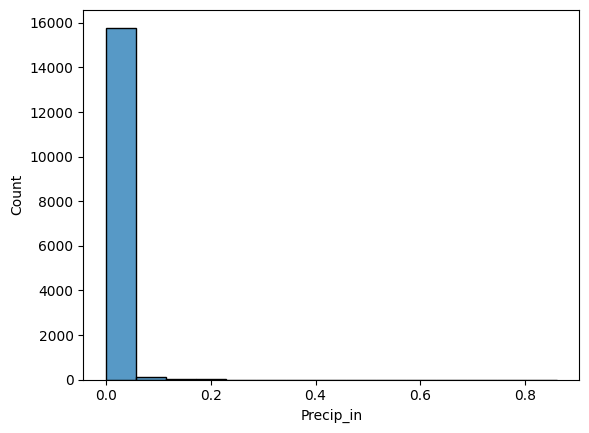

In [32]:
sns.histplot(filtered_les["Precip_in"])

In [83]:
filtered_les["Precip_in"][filtered_les["Precip_in"] > 0]

75       0.01
76       0.01
77       0.03
78       0.02
80       0.03
         ... 
14927    0.04
14928    0.01
14930    0.01
14931    0.01
14932    0.02
Name: Precip_in, Length: 1061, dtype: float64

<Axes: xlabel='Precip_in', ylabel='Count'>

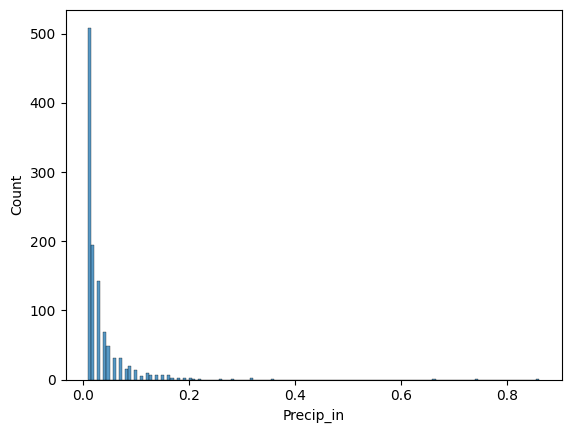

In [34]:
sns.histplot(filtered_les["Precip_in"][filtered_les["Precip_in"] > 0])

In [84]:
filtered_les.loc[filtered_les['Precip_in'] > 0, 'LES_Precipitation'] = 1
filtered_les.loc[filtered_les['Precip_in'] <= 0, 'LES_Precipitation'] = 0
filtered_les

,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,LES_Precipitation
0,goes11.2006.10.01.1400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...","[array([ nan, nan, nan, ...",60.0,49.0,10,270,3600,0,0,10,994.7,1017.8,1017.6,0.0,0.0
1,goes11.2006.10.01.1500.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.06, 0.06, 0.05749...","[array([ nan, nan, nan, ...",60.0,47.0,3,0,0,0,0,10,994.7,1017.7,1017.6,0.0,0.0
2,goes11.2006.10.01.1600.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv,"[0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...","[array([ nan, nan, nan, nan, nan...",59.0,55.0,6,40,0,0,0,10,994.7,1017.8,1017.6,0.0,0.0
3,goes11.2006.10.01.1700.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.067499995, 0.07, ...","[array([ nan, nan, nan, nan, nan, nan, n...",55.0,71.0,0,0,0,0,0,10,994.7,1017.8,1017.6,0.0,0.0
4,goes11.2006.10.01.1800.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv,"[0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...","[array([ nan, nan, nan, nan, nan...",50.0,82.0,0,0,8000,0,0,10,994.7,1017.9,1017.6,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14946,goes15.2015.03.31.1700.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1700.v01.nc-var1-t0.csv.csv,"[0.225, 0.22749999, 0.48, 0.3075, 0.1925, 0.24...","[array([ nan, nan, nan, nan, nan...",39.0,54.0,5,20,7000,10000,0,10,989.0,1012.6,1011.9,0.0,0.0
14947,goes15.2015.03.31.1800.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1800.v01.nc-var1-t0.csv.csv,"[0.2075, 0.1925, 0.18249999, 0.1625, 0.1725, 0...","[array([ nan, nan, nan, nan, nan...",37.0,61.0,3,330,5500,7000,0,10,989.3,1012.8,1012.2,0.0,0.0
14948,goes15.2015.03.31.1900.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1900.v01.nc-var1-t0.csv.csv,"[0.22, 0.1925, 0.1775, 0.16749999, 0.16499999,...","[array([ nan, nan, nan, ...",37.0,66.0,11,310,3500,5500,0,10,990.7,1014.1,1013.5,0.0,0.0
14949,goes15.2015.03.31.2000.v01.nc-var1-t0.csv,T_goes15.2015.03.31.2000.v01.nc-var1-t0.csv.csv,"[0.2575, 0.22, 0.21249999, 0.17999999, 0.185, ...","[array([ nan, nan, nan, nan, nan...",36.0,85.0,0,0,2100,2900,5000,10,991.0,1014.6,1013.9,0.0,0.0


In [152]:
filtered_les['Precip_in'].value_counts()

Precip_in
0.00    13890
0.01      480
0.02      178
0.03      132
0.04       64
0.05       47
0.07       30
0.06       29
0.09       16
0.08       16
0.10       13
0.12        8
0.15        6
0.16        6
0.13        6
0.14        6
0.11        5
0.17        3
0.32        2
0.19        2
0.18        2
0.20        2
0.26        1
0.28        1
0.36        1
0.86        1
0.66        1
0.74        1
0.22        1
0.21        1
Name: count, dtype: int64

In [91]:
filtered_les.columns

Index(['File_name_for_1D_lake', 'File_name_for_2D_lake', 'Lake_data_1D',
       'Lake_data_2D', 'Temp_F', 'RH_pct', 'Wind_Spd_mph',
       'Wind_Direction_deg', 'Low_Cloud_Ht_ft', 'Med_Cloud_Ht_ft',
       'High_Cloud_Ht_ft', 'Visibility_mi', 'Atm_Press_hPa',
       'Sea_Lev_Press_hPa', 'Altimeter_hPa', 'Precip_in', 'LES_Precipitation'],
      dtype='object')

<Axes: xlabel='LES_Precipitation', ylabel='count'>

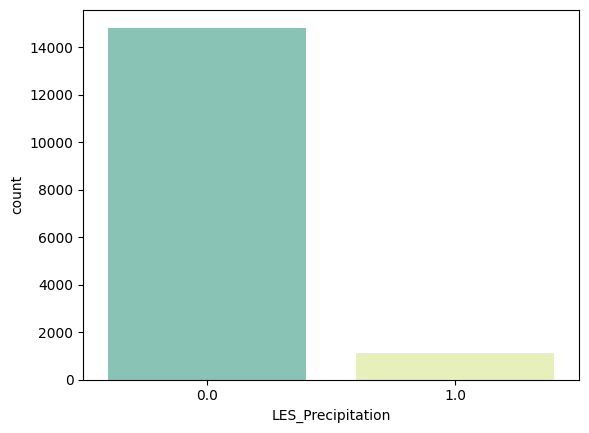

In [36]:
sns.countplot(x = filtered_les['LES_Precipitation'], palette=["#7fcdbb", "#edf8b1"])

In [85]:
import pandas as pd

In [86]:
# Save the DataFrame to a CSV file
filtered_les.to_csv('filtered_les_new.csv', index=False)

## Preparing data for training

In [87]:
les_copy = filtered_les.copy()

In [101]:
les_copy.isna().sum()

File_name_for_1D_lake    0
File_name_for_2D_lake    0
Lake_data_1D             0
Lake_data_2D             0
Temp_F                   0
RH_pct                   0
Wind_Spd_mph             0
Wind_Direction_deg       0
Low_Cloud_Ht_ft          0
Med_Cloud_Ht_ft          0
High_Cloud_Ht_ft         0
Visibility_mi            0
Atm_Press_hPa            0
Sea_Lev_Press_hPa        0
Altimeter_hPa            0
Precip_in                0
LES_Precipitation        0
dtype: int64

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Input, LSTM, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, concatenate
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.utils import Sequence

In [108]:
image_folder = '/Users/shrutitambe/Downloads/FPNN/lake-michigan-images-64/'

In [105]:
# Assuming your images are named from 0.png to 15959.png
def generate_image_paths(folder_path, num_images):
    return [os.path.join(folder_path, f"{i}.png") for i in range(num_images)]

In [110]:
def load_images(image_paths):
    images = []
    for path in image_paths:
        img = load_img(path, target_size=(64, 64))  # adjust target_size as needed
        img_array = img_to_array(img)
        images.append(img_array)
    return np.array(images)

In [113]:
import os
import numpy as np
# Generate image paths and load images
num_images = len(les_copy)
image_paths = generate_image_paths(image_folder, num_images)
image_data = load_images(image_paths)


In [114]:
image_data = image_data / 255.0

In [118]:
# Combine image and numerical data
X_image = image_data
X_numerical = les_copy[les_copy.columns].values
X_numerical = X_numerical.reshape((X_numerical.shape[0], 1, X_numerical.shape[1]))  # reshape for LSTM


In [119]:
X_numerical.shape

(14951, 1, 17)

In [120]:
X_image.shape

(14951, 64, 64, 3)

In [132]:
# Combine both inputs
X_combined = [X_image, X_numerical]

In [122]:
# Define target variable
y = les_copy['LES_Precipitation'].values

In [131]:
print(y.shape)

(14951,)


In [178]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Handle duplicate values in 'Precip_in'
les_copy['Precip_in'] = les_copy['Precip_in'].rank(method='dense')  # Convert to dense ranks to handle duplicates

# Define bin edges based on the provided distribution
bins = [0, 8, 18, 26, les_copy['Precip_in'].max()]
labels = ['no', 'low', 'medium', 'high']

# Create a new column 'Precipitation Class'
les_copy['Precipitation Class'] = pd.cut(les_copy['Precip_in'], bins=bins, labels=labels, include_lowest=True, duplicates='drop')

# Use LabelEncoder to encode the categories (optional)
label_encoder = LabelEncoder()
les_copy['Precipitation Class'] = label_encoder.fit_transform(les_copy['Precipitation Class'])

# Verify the result
print(les_copy[['Precip_in', 'Precipitation Class']])


       Precip_in  Precipitation Class
0            1.0                    3
1            1.0                    3
2            1.0                    3
3            1.0                    3
4            1.0                    3
...          ...                  ...
14946        1.0                    3
14947        1.0                    3
14948        1.0                    3
14949        1.0                    3
14950        1.0                    3

[14951 rows x 2 columns]


In [180]:
les_copy['Precipitation Class'].value_counts()

Precipitation Class
3    14850
1       85
2       12
0        4
Name: count, dtype: int64

In [181]:
les_copy.head(3)

,File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Temp_F,RH_pct,Wind_Spd_mph,Wind_Direction_deg,Low_Cloud_Ht_ft,Med_Cloud_Ht_ft,High_Cloud_Ht_ft,Visibility_mi,Atm_Press_hPa,Sea_Lev_Press_hPa,Altimeter_hPa,Precip_in,LES_Precipitation,Precipitation-Class,Precipitation Class
0,goes11.2006.10.01.1400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...","[array([ nan, nan, nan, ...",60.0,49.0,10,270,3600,0,0,10,994.7,1017.8,1017.6,1.0,0.0,3,3
1,goes11.2006.10.01.1500.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.06, 0.06, 0.05749...","[array([ nan, nan, nan, ...",60.0,47.0,3,0,0,0,0,10,994.7,1017.7,1017.6,1.0,0.0,3,3
2,goes11.2006.10.01.1600.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv,"[0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...","[array([ nan, nan, nan, nan, nan...",59.0,55.0,6,40,0,0,0,10,994.7,1017.8,1017.6,1.0,0.0,3,3


In [174]:
les_copy['Precip_in'].value_counts()

Precip_in
1.0     13890
2.0       480
3.0       178
4.0       132
5.0        64
6.0        47
8.0        30
7.0        29
10.0       16
9.0        16
11.0       13
13.0        8
16.0        6
17.0        6
14.0        6
15.0        6
12.0        5
18.0        3
26.0        2
20.0        2
19.0        2
21.0        2
24.0        1
25.0        1
27.0        1
30.0        1
28.0        1
29.0        1
23.0        1
22.0        1
Name: count, dtype: int64

### Naive Bayes model

In [184]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Extract numerical features
numerical_features = les_copy[['Temp_F', 'RH_pct', 'Wind_Spd_mph', 'Wind_Direction_deg',
                               'Low_Cloud_Ht_ft', 'Med_Cloud_Ht_ft', 'High_Cloud_Ht_ft',
                               'Visibility_mi', 'Atm_Press_hPa', 'Sea_Lev_Press_hPa',
                               'Altimeter_hPa', 'Precip_in']]

# Extract the target variable
target_variable = les_copy['Precipitation Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    numerical_features, target_variable, test_size=0.2, random_state=42
)

# Create a Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()

# Train the model on the training set
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes_model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


Accuracy: 0.98

Confusion Matrix:
[[   0    1    0    0]
 [   0   13    7    0]
 [   1    0    1    0]
 [   0   46    0 2922]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.22      0.65      0.33        20
           2       0.12      0.50      0.20         2
           3       1.00      0.98      0.99      2968

    accuracy                           0.98      2991
   macro avg       0.34      0.53      0.38      2991
weighted avg       0.99      0.98      0.99      2991



### Confusion Matrix

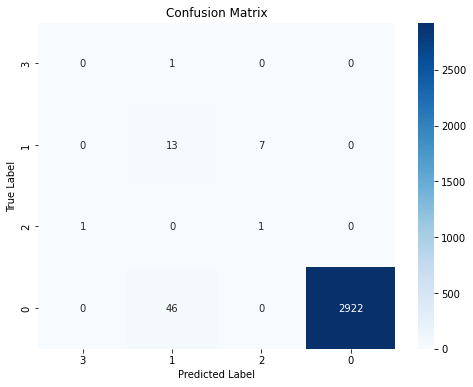

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = naive_bayes_model.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_variable.unique(),
            yticklabels=target_variable.unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### RNN Model for Precipitation Class Prediction with Class Weighting

In [187]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical


# Extract features and target variable
X = les_copy[['Temp_F', 'RH_pct', 'Wind_Spd_mph', 'Wind_Direction_deg',
              'Low_Cloud_Ht_ft', 'Med_Cloud_Ht_ft', 'High_Cloud_Ht_ft',
              'Visibility_mi', 'Atm_Press_hPa', 'Sea_Lev_Press_hPa',
              'Altimeter_hPa', 'Precip_in']]
y = les_copy['Precipitation Class']

# Convert target variable to categorical
y_categorical = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)


In [188]:
# Build the RNN model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_scaled.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [189]:
# Train the model with class weights
history = model.fit(
    np.expand_dims(X_train_scaled, axis=2),
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(np.expand_dims(X_test_scaled, axis=2), y_test),
    class_weight=dict(enumerate(class_weights)),
)

Epoch 1/10
374/374 [==============================] - 45s 99ms/step - loss: 1.2176 - accuracy: 0.9747 - val_loss: 0.5247 - val_accuracy: 0.9843
Epoch 2/10
374/374 [==============================] - 31s 84ms/step - loss: 0.9164 - accuracy: 0.9918 - val_loss: 0.0563 - val_accuracy: 0.9947
Epoch 3/10
374/374 [==============================] - 32s 84ms/step - loss: 0.7066 - accuracy: 0.9944 - val_loss: 0.0331 - val_accuracy: 0.9910
Epoch 4/10
374/374 [==============================] - 32s 84ms/step - loss: 0.5910 - accuracy: 0.9916 - val_loss: 0.0411 - val_accuracy: 0.9893
Epoch 5/10
374/374 [==============================] - 32s 86ms/step - loss: 0.6511 - accuracy: 0.9906 - val_loss: 0.0424 - val_accuracy: 0.9900
Epoch 6/10
374/374 [==============================] - 32s 85ms/step - loss: 0.4762 - accuracy: 0.9912 - val_loss: 0.0318 - val_accuracy: 0.9913
Epoch 7/10
374/374 [==============================] - 32s 84ms/step - loss: 0.4958 - accuracy: 0.9922 - val_loss: 0.0233 - val_accuracy:

In [190]:
# Evaluate the model
test_loss, test_acc = model.evaluate(np.expand_dims(X_test_scaled, axis=2), y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

94/94 [==============================] - 6s 63ms/step - loss: 0.0290 - accuracy: 0.9890
Test Accuracy: 98.90%


### SMOTE Technique

In [192]:
pip install imbalanced-learn


  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
Note: you may need to restart the kernel to use updated packages.


In [202]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

In [201]:
minority_class_samples

0

In [204]:
# Reshape for LSTM input
X_resampled = np.reshape(X_resampled, (X_resampled.shape[0], X_resampled.shape[1], 1))

# Build the RNN model
model2 = Sequential()
model2.add(LSTM(50, input_shape=(X_resampled.shape[1], 1)))
model2.add(Dropout(0.2))
model2.add(Dense(4, activation='softmax'))

# Compile the model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model2.fit(X_resampled, y_resampled, epochs=5, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/5
1486/1486 [==============================] - 131s 85ms/step - loss: 0.1358 - accuracy: 0.9655 - val_loss: 0.0099 - val_accuracy: 0.9950
Epoch 2/5
1486/1486 [==============================] - 120s 80ms/step - loss: 0.0059 - accuracy: 0.9993 - val_loss: 0.0082 - val_accuracy: 0.9960
Epoch 3/5
1486/1486 [==============================] - 115s 78ms/step - loss: 0.0029 - accuracy: 0.9996 - val_loss: 0.0103 - val_accuracy: 0.9953
Epoch 4/5
1486/1486 [==============================] - 116s 78ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0081 - val_accuracy: 0.9963
Epoch 5/5
1486/1486 [==============================] - 117s 79ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 0.0022 - val_accuracy: 0.9990


In [ ]:
# Evaluate the model
test_loss, test_acc = model2.evaluate(np.expand_dims(X_test_scaled, axis=2), y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')

### Using dataset as sequences

In [207]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical


# Extract features and target variable
X = les_copy[['Temp_F', 'RH_pct', 'Wind_Spd_mph', 'Wind_Direction_deg',
          'Low_Cloud_Ht_ft', 'Med_Cloud_Ht_ft', 'High_Cloud_Ht_ft',
          'Visibility_mi', 'Atm_Press_hPa', 'Sea_Lev_Press_hPa',
          'Altimeter_hPa', 'Precip_in']]

y = les_copy['Precipitation Class']

# Convert target variable to categorical
y_categorical = to_categorical(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define sequence length: since we have the data from 2pm to 9pm, we pick 7
sequence_length = 7 

# Prepare sequences for LSTM
X_sequences, y_sequences = [], []

for i in range(len(X_scaled) - sequence_length):
    X_sequences.append(X_scaled[i:i+sequence_length])
    y_sequences.append(y_categorical[i+sequence_length])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

# Use the first 80% of sequences for training and the rest for testing
split_index = int(0.8 * len(X_sequences))
X_train, X_test = X_sequences[:split_index], X_sequences[split_index:]
y_train, y_test = y_sequences[:split_index], y_sequences[split_index:]

In [210]:
# Build the RNN model
model3 = Sequential()
model3.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model3.add(Dropout(0.2))
model3.add(Dense(4, activation='softmax'))

# Compile the model
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model3.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
374/374 [==============================] - 40s 93ms/step - loss: 0.1515 - accuracy: 0.9693 - val_loss: 0.0462 - val_accuracy: 0.9906
Epoch 2/10
374/374 [==============================] - 32s 85ms/step - loss: 0.0290 - accuracy: 0.9935 - val_loss: 0.0438 - val_accuracy: 0.9903
Epoch 3/10
374/374 [==============================] - 32s 85ms/step - loss: 0.0277 - accuracy: 0.9936 - val_loss: 0.0390 - val_accuracy: 0.9900
Epoch 4/10
374/374 [==============================] - 32s 85ms/step - loss: 0.0263 - accuracy: 0.9935 - val_loss: 0.0423 - val_accuracy: 0.9903
Epoch 5/10
374/374 [==============================] - 32s 85ms/step - loss: 0.0260 - accuracy: 0.9936 - val_loss: 0.0387 - val_accuracy: 0.9903
Epoch 6/10
374/374 [==============================] - 32s 86ms/step - loss: 0.0250 - accuracy: 0.9938 - val_loss: 0.0400 - val_accuracy: 0.9906
Epoch 7/10
374/374 [==============================] - 33s 88ms/step - loss: 0.0249 - accuracy: 0.9936 - val_loss: 0.0389 - val_accuracy:

In [211]:
from sklearn.metrics import classification_report


# Evaluate the model on the test data
y_pred = model3.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Generate the classification report
report = classification_report(y_true_classes, y_pred_classes)

# Print the classification report
print(report)

94/94 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00         3
           3       0.99      1.00      1.00      2961

    accuracy                           0.99      2989
   macro avg       0.33      0.33      0.33      2989
weighted avg       0.98      0.99      0.99      2989



/Users/shrutitambe/anaconda3/envs/new_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shrutitambe/anaconda3/envs/new_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shrutitambe/anaconda3/envs/new_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier